## Bank speeches starter template

The [Kaggle data set](https://www.kaggle.com/datasets/davidgauthier/central-bank-speeches/data) used in this project use speeches from senior central bankers of various influential central banks. The corpus runs from 1997 until 2022. Central banks are institutions that define monetary policy. As such, central bank speeches are widely followed and have a major influence on financial markets.

You can also refer to the raw data set and article used [here](https://www.kaggle.com/datasets/magnushansson/central-bank-speeches).

Note that, due to the large number of speeches contained in the data set, you can expect long running times for processing intensive steps such as sentiment analysis when using the full data set (30-60 mins). It is recommended that you reduce the subset of data under review when creating your prototype and then run the full data set through, if required, once the code behaves as expected. You can reduce the data set to, for example, only process data from the United Kingdom (or other countries) or by looking at specific date ranges.

The code is not extensive and you will be expected to use the provided code as a starting point only. You will also need to use your own creativity and logic to identify useful patterns in the data. You can explore sentiment, polarity and entities/keywords, and should use appropriate levels of granularity and aggregation in order to analyse patterns contained in the data.

In [1]:
# Install the necessary libraries.
#!pip install nltk
#!pip install vaderSentiment
#!pip install textblob

In [2]:
# Import relevant libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /Users/apv/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/apv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/apv/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/apv/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
# Load dataset. Change directory as required.
df = pd.read_csv('data2/all_speeches.csv')

In [4]:
df.head()

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


In [5]:
df.country.value_counts()

euro area         2351
united states     1551
united kingdom    1209
japan              755
canada             620
sweden             600
switzerland        351
australia          284
Name: country, dtype: int64

In [6]:
df[df['country']=='united kingdom'].sort_values('date').head()

,reference,country,date,title,author,is_gov,text
4961,r980915a_BOE,united kingdom,1998-09-15,Speech,george,0,"Thank you, Chairman. I'm actually very pleased..."
4962,r981021b_BOE,united kingdom,1998-10-21,Britain in Europe,george,0,It's a great pleasure to be here in the beauti...
4963,r981021a_BOE,united kingdom,1998-10-21,Impact of the recent turbulence in internation...,king,1,Few industries have suffered more from volatil...
4964,r981101a_BOE,united kingdom,1998-11-01,"Economic policy, with and without forecasts",budd,0,My topic this evening is the use of forecasts ...
4965,r981101b_BOE,united kingdom,1998-11-01,Inflation targeting in practice: the UK experi...,vickers,0,"Six years ago this week, sterling left the exc..."


In [7]:
# Demo: Example of adding a column to calculate the string length per speech.
df['len'] = df['text'].str.len()
df

,reference,country,date,title,author,is_gov,text,len
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...,21288
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...,18838
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...,21100
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...,23608
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh...",25337
...,...,...,...,...,...,...,...,...
7716,r221010a_FOMC,united states,2022-10-10,Restoring Price Stability in an Uncertain Econ...,brainard,0,It is a pleasure to join this discussion today...,11505
7717,r221012b_FOMC,united states,2022-10-12,Managing the Promise and Risk of Financial Inn...,barr,0,"Thank you, Chris, and thank you for the invita...",12816
7718,r221012a_FOMC,united states,2022-10-12,Forward Guidance as a Monetary Policy Tool: Co...,bowman,0,Thanks to the Money Marketeers for inviting me...,18600
7719,r221014a_FOMC,united states,2022-10-14,The U.S. Dollar and Central Bank Digital Curre...,waller,0,"Thank you, Professor Jackson, and thank you to...",14060


In [8]:
# Demo: Convert to lower case and remove punctuation.
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['text'] = df['text'].str.replace('[^\w\s]','',regex=True)
df

,reference,country,date,title,author,is_gov,text,len
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,they would no doubt argue that to have two obj...,21288
1,r911003a_BOA,australia,1991-10-03,,fraser,0,today i wish to talk about real interest rates...,18838
2,r920314a_BOA,australia,1992-03-14,,fraser,0,i welcome this opportunity to talk about prosp...,21100
3,r920529a_BOA,australia,1992-05-29,,fraser,0,it is a pleasure to have this opportunity to a...,23608
4,r920817a_BOA,australia,1992-08-17,,fraser,0,as a longtime fan of don sanders i am delighte...,25337
...,...,...,...,...,...,...,...,...
7716,r221010a_FOMC,united states,2022-10-10,Restoring Price Stability in an Uncertain Econ...,brainard,0,it is a pleasure to join this discussion today...,11505
7717,r221012b_FOMC,united states,2022-10-12,Managing the Promise and Risk of Financial Inn...,barr,0,thank you chris and thank you for the invitati...,12816
7718,r221012a_FOMC,united states,2022-10-12,Forward Guidance as a Monetary Policy Tool: Co...,bowman,0,thanks to the money marketeers for inviting me...,18600
7719,r221014a_FOMC,united states,2022-10-14,The U.S. Dollar and Central Bank Digital Curre...,waller,0,thank you professor jackson and thank you to t...,14060


In [9]:
# Subset the data to reduce processing time.
dfi = df[df['country']=='united kingdom'].sort_values('date').reset_index(drop=True)
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reference  1209 non-null   object
 1   country    1209 non-null   object
 2   date       1209 non-null   object
 3   title      1209 non-null   object
 4   author     1209 non-null   object
 5   is_gov     1209 non-null   int64 
 6   text       1209 non-null   object
 7   len        1209 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 75.7+ KB


In [10]:
%%time
# Demo: Sentiment intensity analysis using Vadar sentiment and a for loop.
sia = SentimentIntensityAnalyzer()
dft = pd.DataFrame(columns=['neg', 'neu', 'pos', 'compound'])
for j in dfi.index:
    score = sia.polarity_scores(dfi.iloc[j,6])
    new_row = pd.DataFrame({'neg': score['neg'], 'neu': score['neu'], 'pos': score['pos'], 'compound': score['compound']}, index=[j])
    dft = pd.concat([dft, new_row], ignore_index=True)
dfi = pd.concat([dfi, dft], axis=1, join="inner")
dfi

CPU times: user 9min 50s, sys: 7.63 s, total: 9min 58s
Wall time: 9min 58s


,reference,country,date,title,author,is_gov,text,len,neg,neu,pos,compound
0,r980915a_BOE,united kingdom,1998-09-15,Speech,george,0,thank you chairman im actually very pleased to...,13731,0.084,0.820,0.095,0.9925
1,r981021b_BOE,united kingdom,1998-10-21,Britain in Europe,george,0,its a great pleasure to be here in the beautif...,24263,0.068,0.776,0.156,0.9999
2,r981021a_BOE,united kingdom,1998-10-21,Impact of the recent turbulence in internation...,king,1,few industries have suffered more from volatil...,13678,0.078,0.805,0.117,0.9984
3,r981101a_BOE,united kingdom,1998-11-01,"Economic policy, with and without forecasts",budd,0,my topic this evening is the use of forecasts ...,27679,0.051,0.860,0.088,0.9996
4,r981101b_BOE,united kingdom,1998-11-01,Inflation targeting in practice: the UK experi...,vickers,0,six years ago this week sterling left the exch...,27693,0.068,0.840,0.092,0.9991
...,...,...,...,...,...,...,...,...,...,...,...,...
1204,r221007a_BOE,united kingdom,2022-10-07,"Shocks, inflation, and the policy response",ramsden,0,thank you very much for the invitation to spea...,24773,0.060,0.865,0.075,0.9957
1205,r221012a_BOE,united kingdom,2022-10-12,Monetary policy: an anchor in challenging times,pill,0,huw pill talks about how we will bring inflati...,22398,0.050,0.843,0.107,0.9997
1206,r221015a_BOE,united kingdom,2022-10-15,Monetary policy and financial stability interv...,bailey,1,we are meeting in the most difficult of times ...,10270,0.093,0.820,0.086,-0.9770
1207,r221019a_BOE,united kingdom,2022-10-19,"Governance of “Decentralised” Finance: Get up,...",wilkins,0,these are divided into seven categories suffra...,33040,0.042,0.831,0.127,0.9999


In [11]:
%%time
# Demo: Using a self defined function with Textblob to calculate polarity and subjectivity.
def generate_polarity_subjectivity(dfs):
    dft2 = TextBlob(dfs).sentiment
    return pd.Series([dft2[0], dft2[1]])

# Apply the function to the data and add two new columns
dfi[['polarity','subjectivity']] = dfi['text'].apply(generate_polarity_subjectivity)
dfi.head()

CPU times: user 9.73 s, sys: 74.8 ms, total: 9.8 s
Wall time: 9.82 s


,reference,country,date,title,author,is_gov,text,len,neg,neu,pos,compound,polarity,subjectivity
0,r980915a_BOE,united kingdom,1998-09-15,Speech,george,0,thank you chairman im actually very pleased to...,13731,0.084,0.820,0.095,0.9925,0.083288,0.435206
1,r981021b_BOE,united kingdom,1998-10-21,Britain in Europe,george,0,its a great pleasure to be here in the beautif...,24263,0.068,0.776,0.156,0.9999,0.076711,0.368726
2,r981021a_BOE,united kingdom,1998-10-21,Impact of the recent turbulence in internation...,king,1,few industries have suffered more from volatil...,13678,0.078,0.805,0.117,0.9984,0.091432,0.394993
3,r981101a_BOE,united kingdom,1998-11-01,"Economic policy, with and without forecasts",budd,0,my topic this evening is the use of forecasts ...,27679,0.051,0.860,0.088,0.9996,0.086707,0.476692
4,r981101b_BOE,united kingdom,1998-11-01,Inflation targeting in practice: the UK experi...,vickers,0,six years ago this week sterling left the exch...,27693,0.068,0.840,0.092,0.9991,0.058467,0.394488


In [12]:
%%time
# Demo: Frequency distribution review of a single speech.

# Tokenise the text data.
stop_words=set(stopwords.words('english'))
filtered_text = []

# Example speech using iloc to reference (Hint: Can be used in loops if required).
tokenized_word = word_tokenize(dfi.iloc[0,6])

# Filter the tokenised words.
for each_word in tokenized_word:
    if each_word.lower() not in stop_words and each_word.isalpha():
        filtered_text.append(each_word.lower())

# Display the filtered list.
#print('Tokenised list without stop words: {}'.format(filtered_text))

# Create a frequency distribution object.
freq_dist_of_words = FreqDist(filtered_text)

# Show the five most common elements in the data set.
freq_dist_of_words.most_common(10)

CPU times: user 6.71 ms, sys: 1.21 ms, total: 7.92 ms
Wall time: 9.65 ms


[('economy', 26),
 ('inflation', 22),
 ('growth', 15),
 ('policy', 13),
 ('demand', 13),
 ('employment', 10),
 ('whole', 9),
 ('sectors', 9),
 ('know', 8),
 ('capacity', 8)]

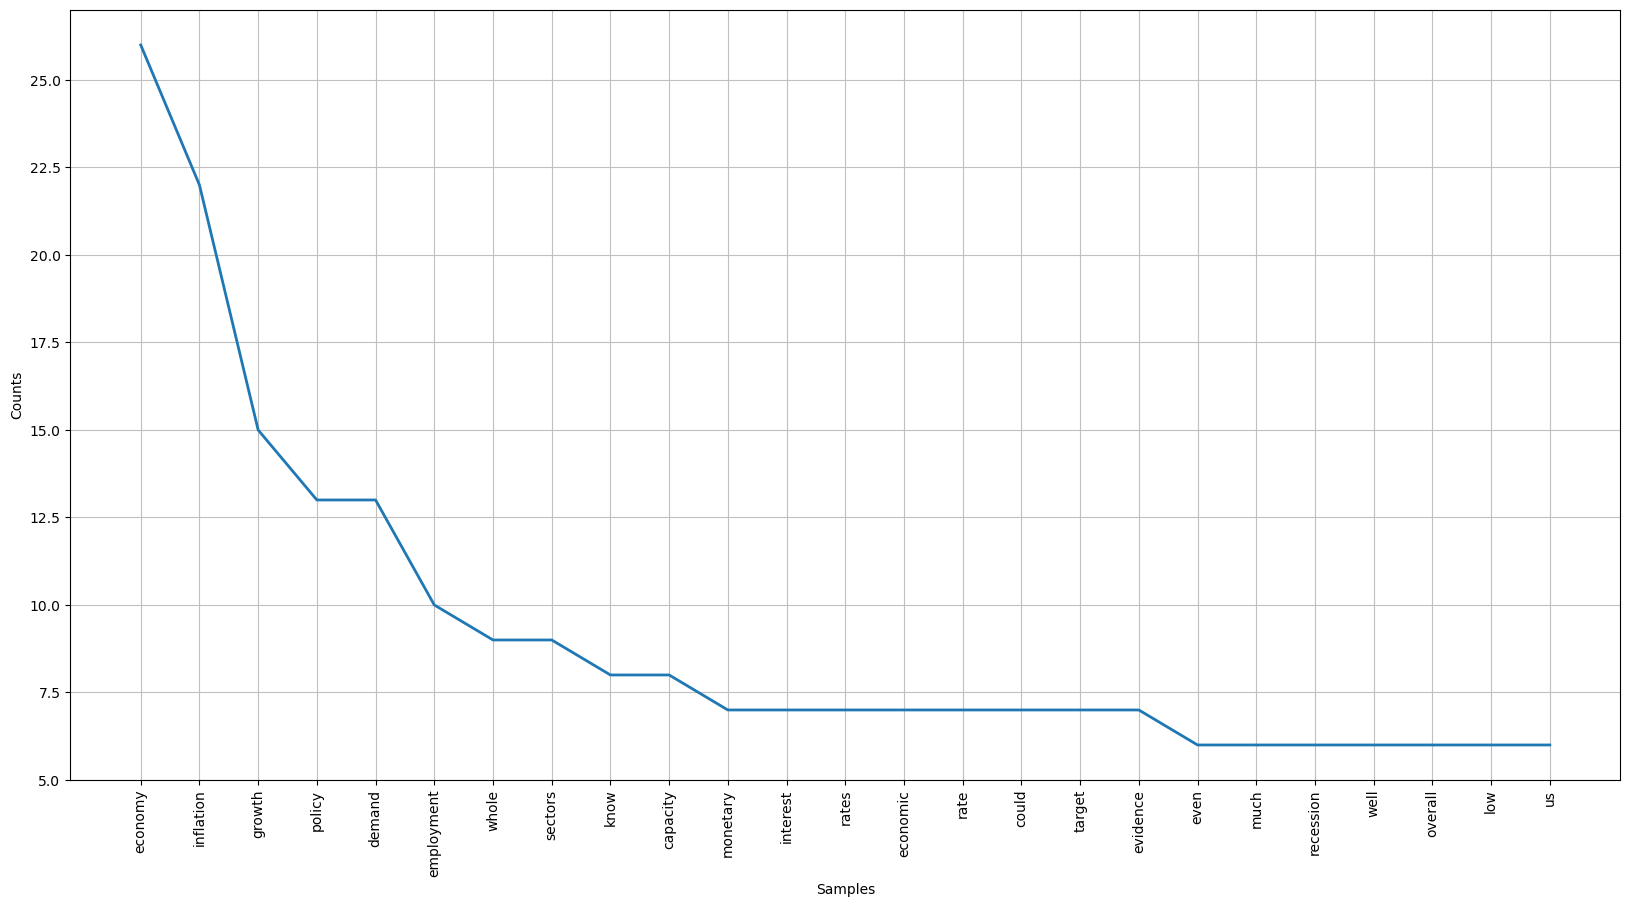

In [13]:
# Set plotting options and plot the data.
fig, ax = plt.subplots(dpi=100)
fig.set_size_inches(20, 10)
freq_dist_of_words.plot(25, cumulative=False)
plt.show()